<a href="https://colab.research.google.com/github/RamirezArizpe/Ciencia-de-datos-para-negocios/blob/UCA-Inteligencia-Artificial/Predecir_el_precio_de_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

_df = pd.read_csv("https://raw.githubusercontent.com/RamirezArizpe/Ciencia-de-datos-para-negocios/refs/heads/main/Bitcoin_1_1_2019-6_11_2025_historical_data_coinmarketcap.csv", delimiter=';')
# Ordenamos correctamente
_df = _df.sort_index(ascending=False)
_df.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,circulatingSupply,timestamp
397,2024-10-04T00:00:00.000Z,2024-10-04T23:59:59.999Z,2024-10-04T20:56:00.000Z,2024-10-04T00:55:00.000Z,2781,60754.625126,62465.990758,60459.939817,62067.477447,2.958547e+10,1.226648e+12,19763093,2024-10-04T23:59:59.999Z
396,2024-10-05T00:00:00.000Z,2024-10-05T23:59:59.999Z,2024-10-05T13:13:00.000Z,2024-10-05T03:04:00.000Z,2781,62067.610497,62371.023679,61689.581165,62089.948459,1.330541e+10,1.227022e+12,19763584,2024-10-05T23:59:59.999Z
395,2024-10-06T00:00:00.000Z,2024-10-06T23:59:59.999Z,2024-10-06T19:31:00.000Z,2024-10-06T04:43:00.000Z,2781,62084.986501,62959.568541,61833.150043,62818.954476,1.477623e+10,1.241559e+12,19764040,2024-10-06T23:59:59.999Z
394,2024-10-07T00:00:00.000Z,2024-10-07T23:59:59.999Z,2024-10-07T14:25:00.000Z,2024-10-07T23:01:00.000Z,2781,62819.109333,64443.706412,62152.551708,62236.659368,3.425356e+10,1.229782e+12,19764540,2024-10-07T23:59:59.999Z
393,2024-10-08T00:00:00.000Z,2024-10-08T23:59:59.999Z,2024-10-08T14:03:00.000Z,2024-10-08T19:16:00.000Z,2781,62221.645149,63174.306200,61843.563661,62131.967854,2.813448e+10,1.228038e+12,19765071,2024-10-08T23:59:59.999Z


In [37]:
df.shape

(398, 5)

In [22]:
'timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high',
'low', 'close', 'volume', 'marketCap', 'timestamp'

('low', 'close', 'volume', 'marketCap', 'timestamp')

In [23]:
df = _df[['timeOpen', 'open', 'high', 'low', 'close']]

In [24]:
dates = df[['close']].values

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dates)

In [45]:
window_size = 15

In [46]:
import numpy as np

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        # El precio es la primera columna
        labels.append(data[i + window_size, 0])
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, window_size)

In [47]:
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
early_stop = EarlyStopping(
    monitor='val_loss',     # métrica a monitorear
    patience=5,             # número de épocas sin mejora antes de detener
    restore_best_weights=True # recupera los mejores pesos
)

In [ ]:
model.compile(optimizer='adam', loss='mse')  # o la función de pérdida que uses
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN # hay diferentes tipo sde RNN, LSTM, GRU, son redes recurrentes, cada una mejor que la anterior
#Guardan una variable previa, tienen un valor de entrada, calculan y dan un valor de salida

model = Sequential()
model.add(SimpleRNN(units=120, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model.add(SimpleRNN(units=60, return_sequences=False))
model.add(Dense(units=30))
model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0665
Epoch 2/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0062
Epoch 3/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0034
Epoch 4/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019
Epoch 5/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0031
Epoch 6/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0024
Epoch 7/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0030
Epoch 8/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0024
Epoch 9/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0021
Epoch 10/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0021
Epoch 11/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015
Epoch 12/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018
Epoch 13/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0014
Epoch 14/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0019
Epoch 15/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 2

In [50]:
# Hacer predicciones
predictions = model.predict(X_test)

# Desescalar los datos predichos
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 1918.3465428329118
RMSE: 2375.290813310798


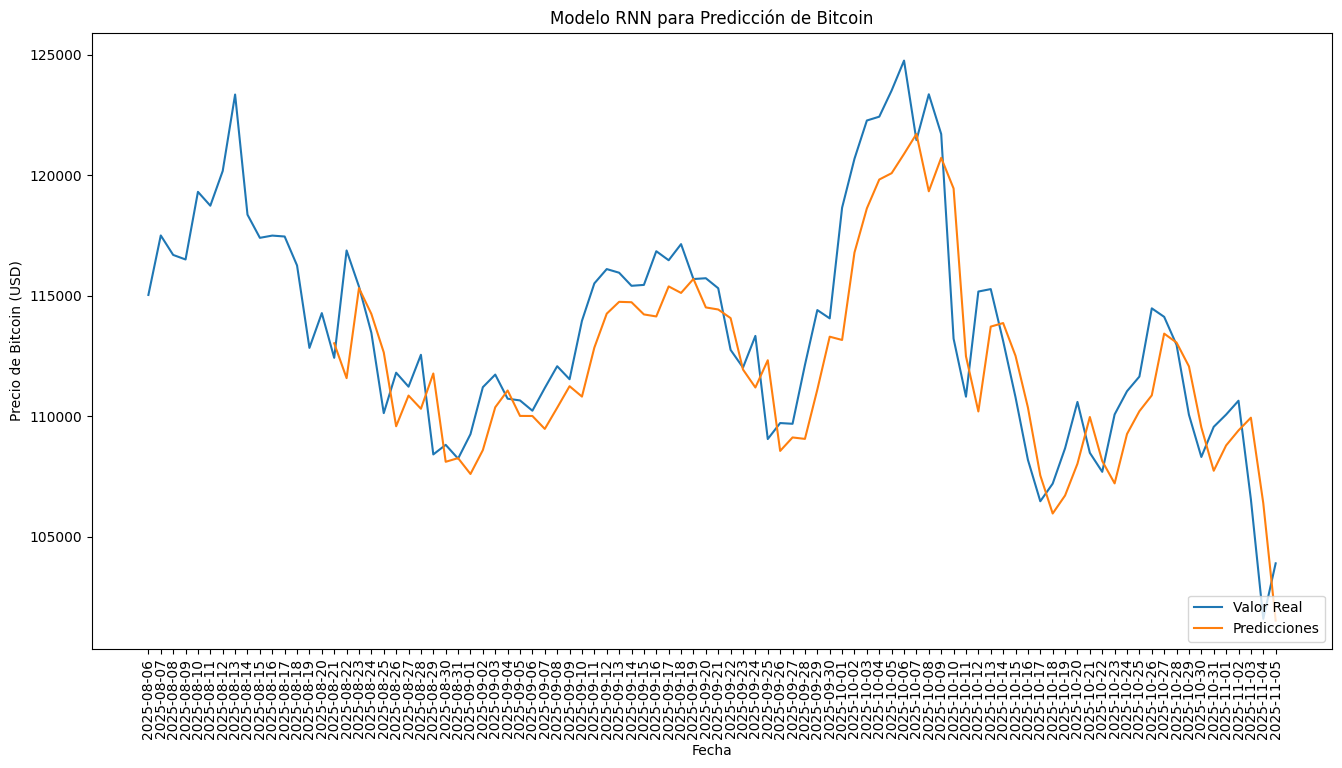

In [52]:
import matplotlib.pyplot as plt
import numpy as np

valid = df[split:]
# Reiniciar el índice del DataFrame de validación
valid = valid.reset_index(drop=True)
# Inicializar la columna de predicciones con NaN
valid['Predictions'] = np.nan

# Añadir las predicciones al DataFrame de validación desde el punto donde inician las predicciones
valid.loc[window_size:, 'Predictions'] = predictions
dates_valid = pd.to_datetime(valid['timeOpen']).apply(lambda x: x.strftime('%Y-%m-%d')).tolist()

plt.figure(figsize=(16,8))
plt.title('Modelo RNN para Predicción de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']])
plt.legend(['Valor Real', 'Predicciones'], loc='lower right')
plt.xticks(rotation=90)
plt.show()

In [53]:
# Generar secuencias para los siguientes días
future_sequences = []
# Última secuencia de los valores que tenemos
last_sequence = X[-1]

days = 10
for _ in range(days):
    # Predecir el siguiente valor
    next_value = model.predict(np.array([last_sequence]))[0, 0]

    # Actualizar la secuencia para la siguiente predicción
    last_sequence = np.concatenate((last_sequence[1:], [[next_value]]), axis=0)

    # Añadir la nueva secuencia a las secuencias futuras
    future_sequences.append(last_sequence)

# Convertir las secuencias futuras a un numpy y reshape para la RNN
future_sequences = np.array(future_sequences)
future_sequences = np.reshape(future_sequences, (future_sequences.shape[0], future_sequences.shape[1], 1))

# Hacer predicciones para los siguientes días
future_predictions = model.predict(future_sequences)

# Desescalar los datos predichos para los siguientes días
future_predictions = scaler.inverse_transform(np.concatenate((future_predictions, np.zeros((future_predictions.shape[0], 3))), axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


In [54]:
# Última fecha en los datos reales
last_date = df['timeOpen'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=days)[1:]
future_dates = future_dates.strftime('%Y-%m-%d').tolist()

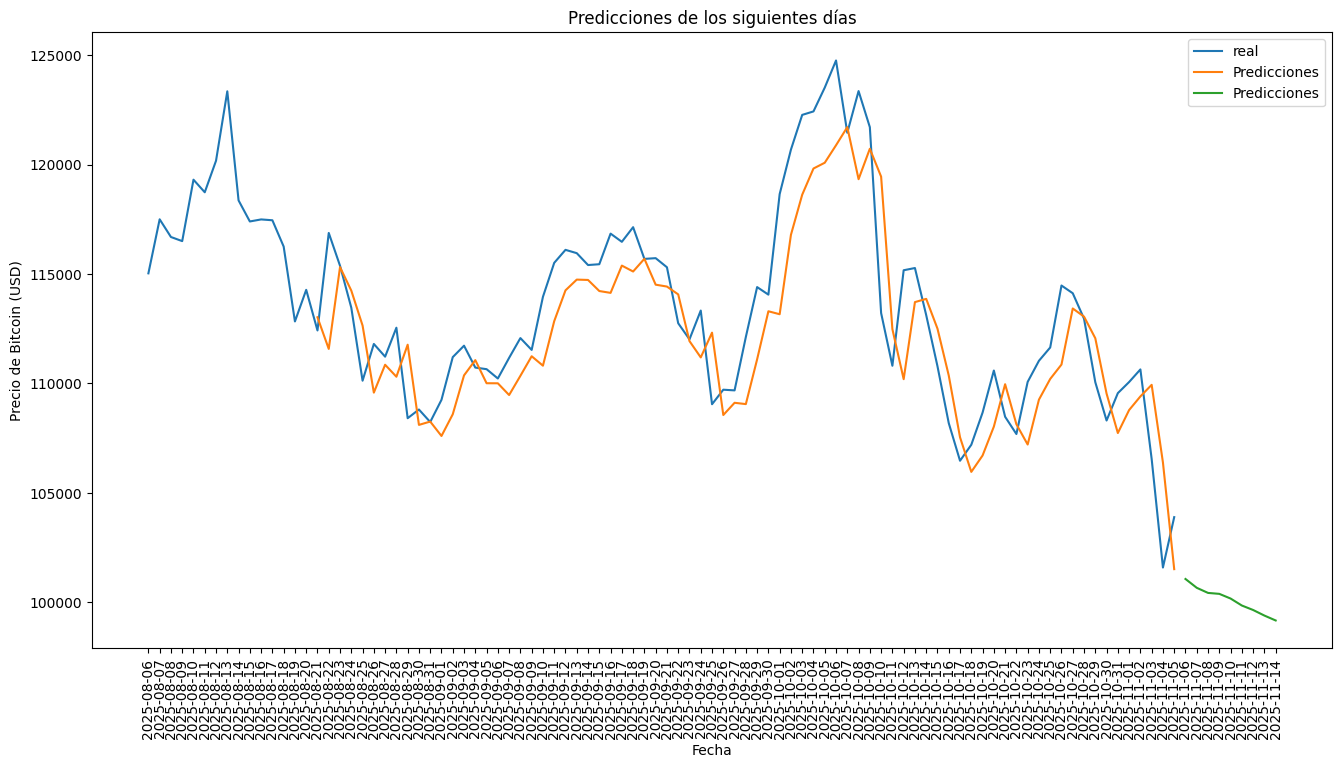

In [55]:
plt.figure(figsize=(16,8))
plt.title('Predicciones de los siguientes días')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']], label=['real', 'Predicciones'])
plt.plot(future_dates, future_predictions[:-1], label='Predicciones')
plt.legend()
plt.xticks(rotation=90)
plt.show()